In [1]:
import netCDF4
import math
import xarray as xr
import dask
import numpy as np
import time
import scipy
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import transforms
from matplotlib.animation import PillowWriter

In [2]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/Small_Sample/Useful_Files/Amazon_Rainforest.nc'
amazon = xr.open_dataset(path_to_file)
#test_ds.variables

path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/Small_Sample/Useful_Files/Siberia.nc'
siberia = xr.open_dataset(path_to_file)
#test_ds.variables

path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/Small_Sample/New_SPCAM5/TimestepOutput_Neuralnet_SPCAM_216/run/Cpac_gridcell_rcat.nc'
test_ds = xr.open_dataset(path_to_file)
#test_ds.variables

In [3]:
amazon_T = np.squeeze(amazon.CRM_T.values)

siberia_T = np.squeeze(siberia.CRM_T.values)

test_T = np.squeeze(test_ds.CRM_T.values)

In [4]:
print(test_T.shape)

(96, 30, 128)


In [5]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/Small_Sample/Useful_Files/CRM_T_Analysis.nc'
test_ds = xr.open_dataset(path_to_file)
all_T = np.squeeze(test_ds.CRM_T.values)
print(all_T.shape)

(96, 30, 128, 96, 144)


In [6]:
equator_T = np.squeeze(all_T[:,:,:,47,:])
equator_T = np.nanmean(equator_T, axis = 3)


north_T = np.squeeze(all_T[:,:,:,80,:])
north_T = np.nanmean(north_T, axis = 3)

In [7]:
siberia_anons = siberia_T - north_T
amazon_anons = amazon_T - equator_T
test_anons = test_T - equator_T

In [8]:
def utc_timing(times):
    utc_list = []
    end_times = [':00',':15',':30',':45']
    counter = 0
    thing = 0
    for i in range(times):
        if thing == 95:
            thing = 0
        
        beg_time = int(thing/4)
        if beg_time == 0:
            beg_time = 24
        ending = end_times[counter]
        counter = counter + 1
        if counter  == 4:
            counter = 0
        
        utc_time = str(beg_time)+ending
        utc_list.append(utc_time)
        thing = thing + 1
        
        
    
    #print(utc_list)
    return utc_list

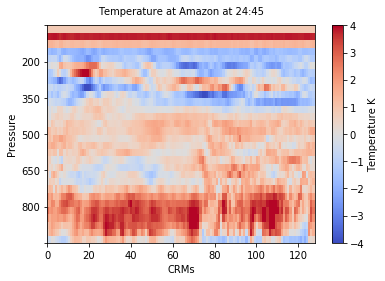

In [9]:
varname = "Temperature"
location = 'Amazon'
units = "K"
savepath = 'T'

def anime_col(values, var, unit, save, local):
    plt.rcParams['animation.ffmpeg_path'] = '/export/home/gmooers/miniconda3/bin/ffmpeg'
    container = []

    
    fig, ax = plt.subplots(1, 1)
    times = len(values)
    utc_list = utc_timing(times)
    for i in range(times):
            
        #base = plt.gca().transData
        #rot = transforms.Affine2D().rotate_deg(270)
        
        im = ax.pcolor(np.squeeze(values[i,:, :]), vmin = -4.0, vmax = 4.0, cmap = 'coolwarm', animated= True) #transform = rot + base)
        if i ==0:
            fig.colorbar(im, label=var+' '+unit)
        plt.ylabel("Pressure")
        plt.xlabel('CRMs')
        title_feat = ax.text(0.5,1.05,var+' at '+local+" at "+utc_list[i], 
                    size=10,
                    ha="center", transform=ax.transAxes, )
        
        my_yticks = np.arange(50, 1000, 150)
        my_yticks[::-1].sort()
        ax.set_yticklabels(my_yticks)
        
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
        yticks[-1].label1.set_visible(False)
    
        container.append([im, title_feat])
      
    ani = animation.ArtistAnimation(fig, container, interval = 150, blit = True, repeat = True)
    ani.save('/fast/gmooers/Figures/Animate/Single_Day_'+save+'_'+local+'_Animations.mp4')
    #plt.show()
    
anime_col(amazon_anons, varname, units, savepath, location)

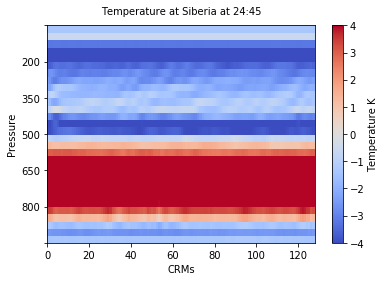

In [10]:
location = 'Siberia'
anime_col(siberia_anons, varname, units, savepath, location)

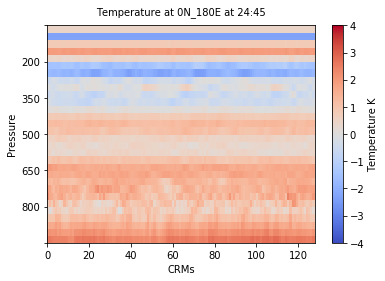

In [11]:
location = '0N_180E'
anime_col(test_anons, varname, units, savepath, location)